# Kalshi Market Exploration

This notebook provides a starting point for exploring Kalshi prediction markets.

In [1]:
# Setup notebook environment
import matplotlib.pyplot as plt

from kalshi_research.research.notebook_utils import load_markets, setup_notebook

setup_notebook()

Notebook configured for Kalshi research.


In [2]:
# Load open markets
markets = await load_markets(status="open", limit=500)
print(f"Loaded {len(markets)} markets")
markets.head()

Loaded 500 markets


,ticker,title,subtitle,yes_price,yes_bid,yes_ask,spread,volume,open_interest,close_time,status,event_ticker
0,KXMVESPORTSMULTIGAMEEXTENDED-S2025F0379E9A7F8-...,"yes Sacramento,yes Detroit,yes Houston,yes New...",,0.0000,0,0,0,0,0,2026-01-21 04:00:00+00:00,MarketStatus.ACTIVE,KXMVESPORTSMULTIGAMEEXTENDED-S2025F0379E9A7F8
1,KXMVENBASINGLEGAME-S202566E5E1A4D08-5AF2D589854,"yes Zach LaVine: 1+,yes DeMar DeRozan: 2+,yes ...",,0.0000,0,0,0,0,0,2026-01-21 04:00:00+00:00,MarketStatus.ACTIVE,KXMVENBASINGLEGAME-S202566E5E1A4D08
2,KXMVENBASINGLEGAME-S2025B82FBA2FECE-8D7E4444F57,"yes DeMar DeRozan: 2+,yes Dallas,yes Anthony D...",,0.0000,0,0,0,0,0,2026-01-21 04:00:00+00:00,MarketStatus.ACTIVE,KXMVENBASINGLEGAME-S2025B82FBA2FECE
3,KXMVESPORTSMULTIGAMEEXTENDED-S2025CA926EEBD3D-...,"yes New York,yes Golden State,yes Toronto,yes ...",,0.0000,0,0,0,0,0,2026-01-22 00:30:00+00:00,MarketStatus.ACTIVE,KXMVESPORTSMULTIGAMEEXTENDED-S2025CA926EEBD3D
4,KXMVESPORTSMULTIGAMEEXTENDED-S20257451FF878EF-...,"yes Houston,yes Oklahoma City wins by over 6.5...",,0.0000,0,0,0,0,0,2026-01-22 03:00:00+00:00,MarketStatus.ACTIVE,KXMVESPORTSMULTIGAMEEXTENDED-S20257451FF878EF


In [3]:
# Basic statistics
print(f"Total volume: {markets['volume'].sum():,}")
print(f"Avg spread: {markets['spread'].mean():.1f}c")
print(
    f"Markets near 50%: {len(markets[(markets['yes_price'] > 0.4) & (markets['yes_price'] < 0.6)])}"
)

Total volume: 14,370
Avg spread: 7.0c
Markets near 50%: 21


In [4]:
# Top markets by volume
markets.nlargest(20, "volume")[["ticker", "title", "yes_price", "volume"]]

,ticker,title,yes_price,volume
489,KXMVESPORTSMULTIGAMEEXTENDED-S20258845F2E60A6-...,"yes Zach LaVine: 4+,yes Sacramento,yes DeMar D...",0.5000,3630
317,KXMVESPORTSMULTIGAMEEXTENDED-S20256DCF092F86E-...,"yes Zach LaVine: 3+,yes Anthony Davis: 20+,yes...",0.5000,2777
445,KXMVESPORTSMULTIGAMEEXTENDED-S202509E787D74ED-...,"yes Cooper Flagg: 1+,yes Zach LaVine: 3+,yes C...",0.5000,2624
303,KXMVESPORTSMULTIGAMEEXTENDED-S20257C8F27AA4CC-...,"yes Sacramento,yes Portland,yes Los Angeles C,...",0.0050,769
263,KXMVENBASINGLEGAME-S20254E8BC116E85-97A53A2DD05,"yes Anthony Davis: 25+,yes Dallas wins by over...",0.5000,678
417,KXMVENBASINGLEGAME-S20252B8BFFF590E-E32E957B205,"yes Zach LaVine: 1+,yes DeMar DeRozan: 2+,yes ...",0.1000,537
223,KXMVESPORTSMULTIGAMEEXTENDED-S202583C435F275B-...,"yes DeMar DeRozan: 4+,yes Cooper Flagg: 15+,ye...",0.5000,449
249,KXMVENBASINGLEGAME-S2025F8B6B2B5803-62D8277A322,"yes Cooper Flagg: 30+,yes Cooper Flagg: 12+",0.0150,406
497,KXMVESPORTSMULTIGAMEEXTENDED-S20259855E6BF78A-...,"yes Sacramento,yes DeMar DeRozan: 19+,yes Zach...",0.0300,377
405,KXMVESPORTSMULTIGAMEEXTENDED-S2025CAA6BC68FD9-...,"yes Detroit,yes Los Angeles C,yes Utah",0.5000,373


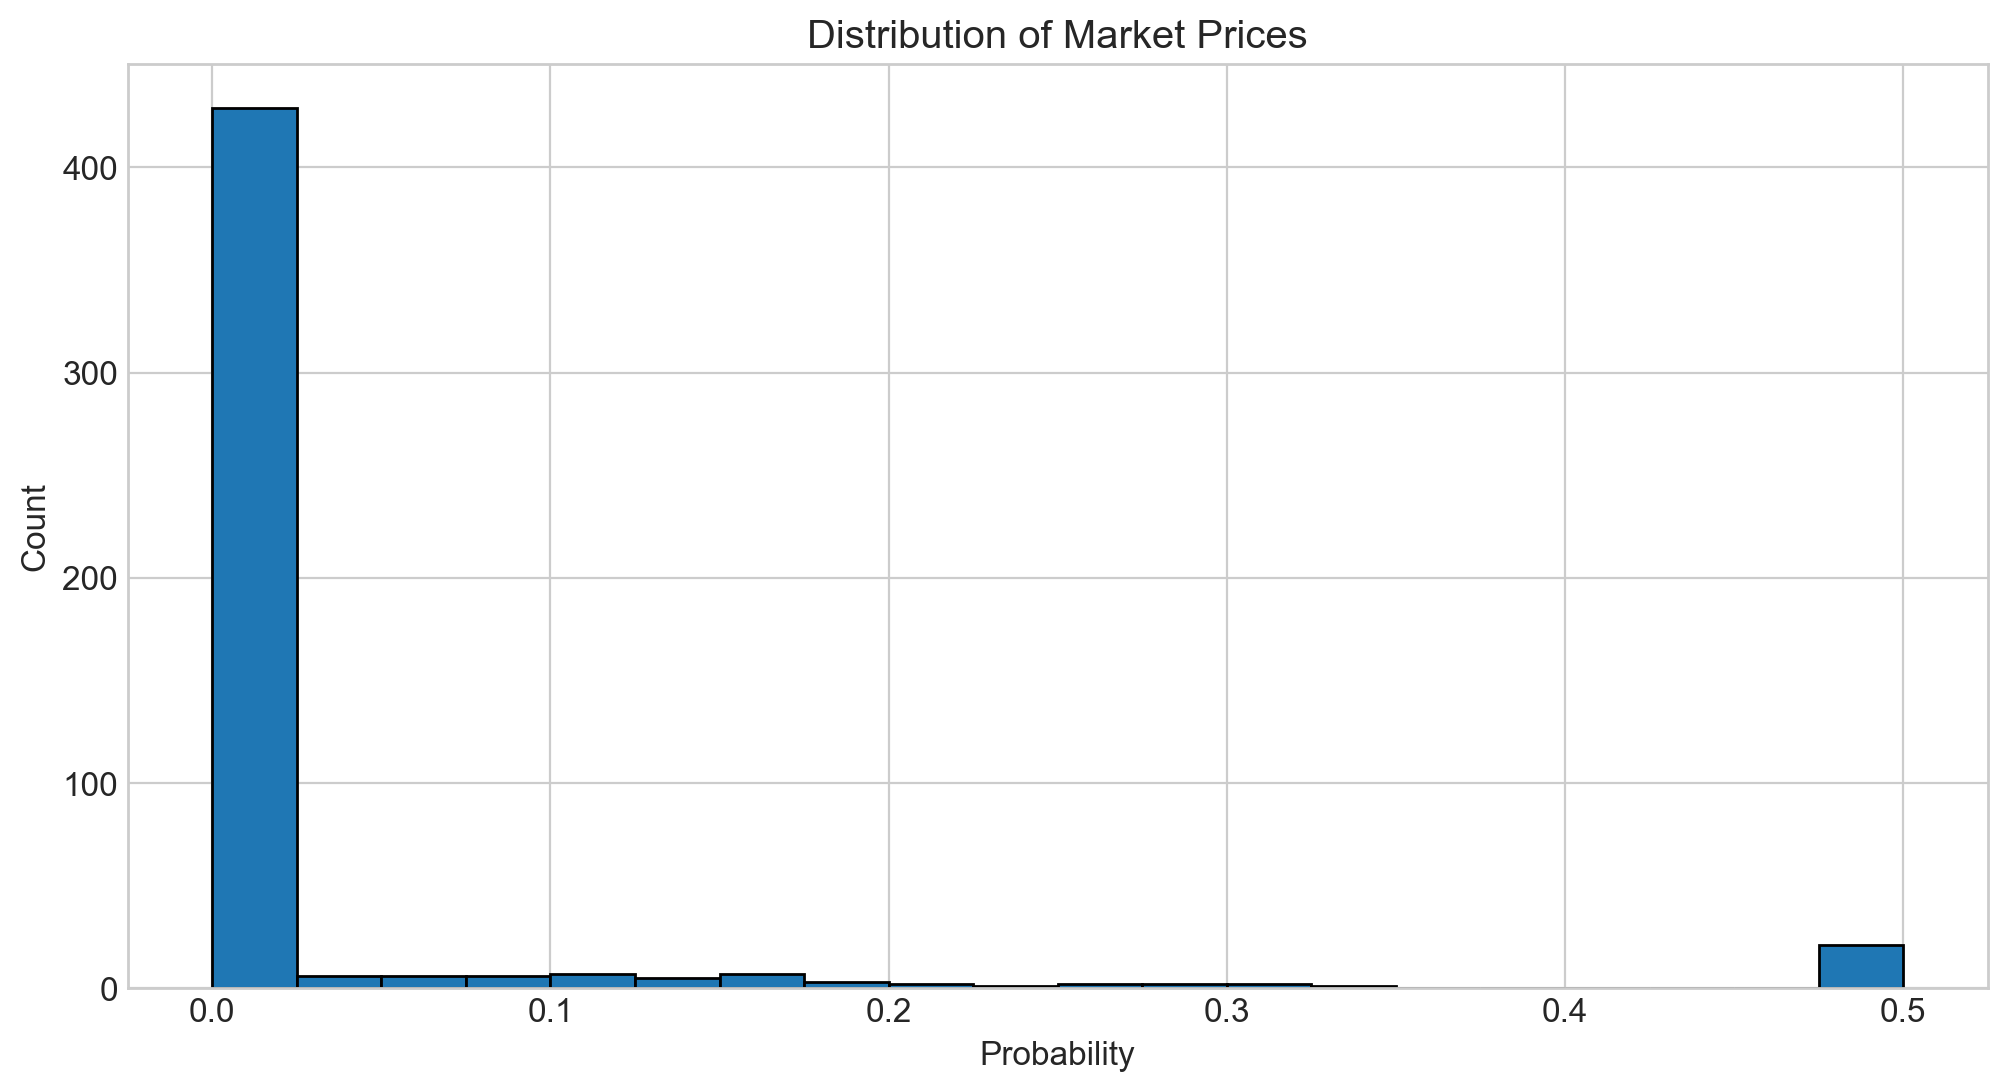

In [5]:
# Price distribution
plt.figure(figsize=(12, 6))
markets["yes_price"].hist(bins=20, edgecolor="black")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.title("Distribution of Market Prices")
plt.show()

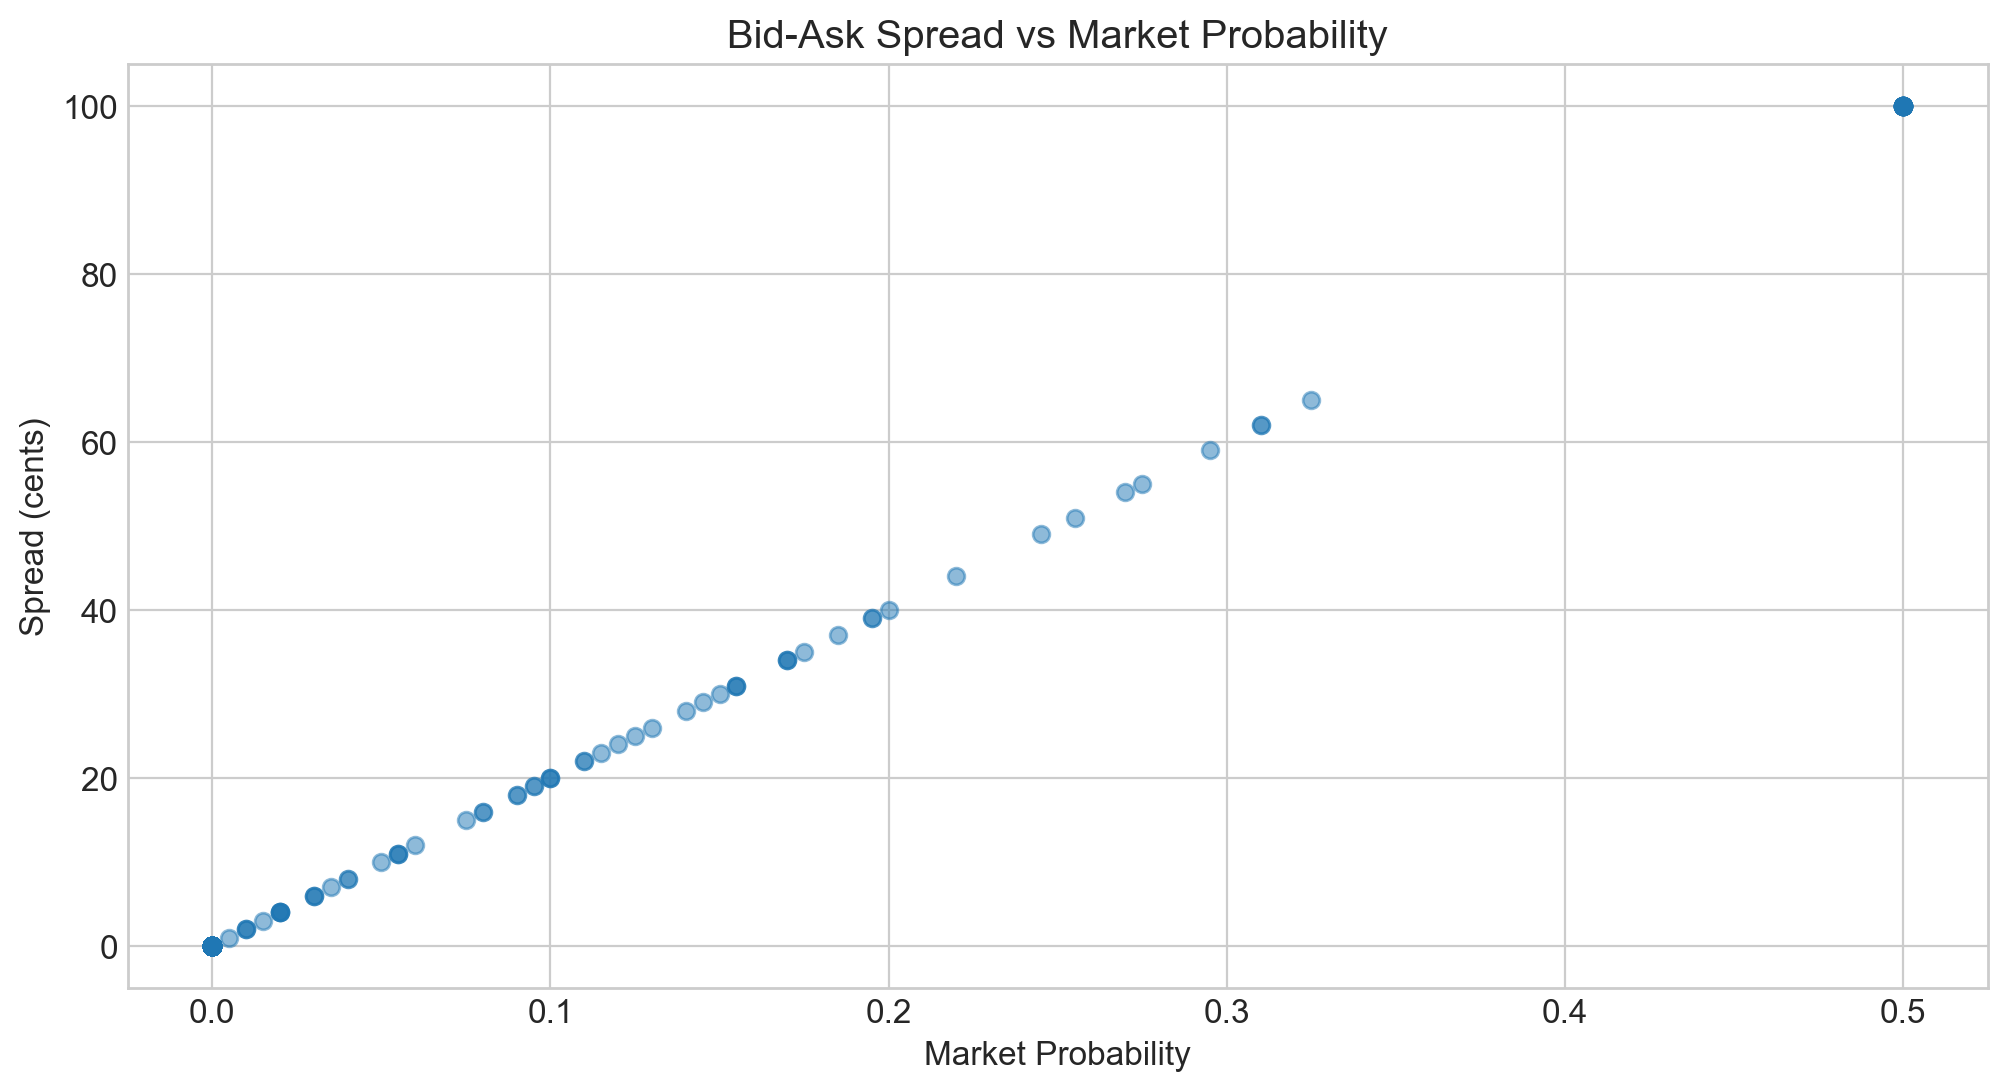

In [6]:
# Spread vs probability
plt.figure(figsize=(12, 6))
plt.scatter(markets["yes_price"], markets["spread"], alpha=0.5)
plt.xlabel("Market Probability")
plt.ylabel("Spread (cents)")
plt.title("Bid-Ask Spread vs Market Probability")
plt.show()